/tmp/ipykernel_21190/1191329493.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)
/tmp/ipykernel_21190/1191329493.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

Accuracy: 0.6476190476190476

Confusion Matrix:
 [[ 1 35]
 [ 2 67]]

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.03      0.05        36
           1       0.66      0.97      0.78        69

    accuracy                           0.65       105
   macro avg       0.50      0.50      0.42       105
weighted avg       0.55      0.65      0.53       105



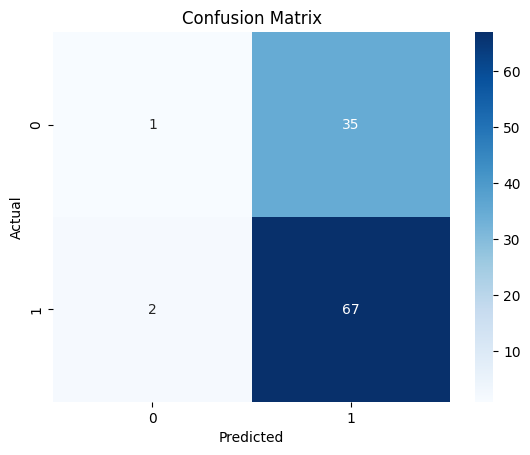


Cross-Validation Scores: [0.67619048 0.67307692 0.67307692 0.63461538 0.66346154]
Average Cross-Validation Score: 0.664084249084249


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv("Consumer creditworthiness train data.xlsx - Sheet1.csv")

# Drop 'Loan_ID' as it's an identifier and not useful for prediction
data = data.drop('Loan_ID', axis=1)

# Handle missing values if any (simple strategy - fill with mode for categorical, median for numerical)
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].median(), inplace=True)

# Encode categorical columns
label_encoders = {}
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Encode the target variable 'Loan_Status'
target_encoder = LabelEncoder()
data['Loan_Status'] = target_encoder.fit_transform(data['Loan_Status'])

# Split into features and labels
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", cv_scores.mean())
